# Bean Classification 

## Data Set Information:

Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

## Attribute Information:

- Area (A): The area of a bean zone and the number of pixels within its boundaries.
- Perimeter (P): Bean circumference is defined as the length of its border.
- Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
- Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- Aspect ratio (K): Defines the relationship between L and l.
- Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
- Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
- Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
- Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
- Roundness (R): Calculated with the following formula: (4piA)/(P^2)
- Compactness (CO): Measures the roundness of an object: Ed/L
- ShapeFactor1 (SF1)
- ShapeFactor2 (SF2)
- ShapeFactor3 (SF3)
- ShapeFactor4 (SF4)
- Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

In [8]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns


### Importing data

In [9]:
df = pd.read_csv("Dry_Bean.csv")

In [10]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [11]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [12]:
# profile = pandas_profiling.ProfileReport(df)
# profile.to_file(output_file="Bean_data_before_preprocessing.html")

## Applying machine learning without any preprocessing

In [13]:
l=sorted(list(set(df.loc[:,"Class"])))

In [14]:
df.loc[:,"Class"].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

## Encoding Target variables

In [15]:
def Target_encoder(val):
    if(val=='BARBUNYA'):
        return 0
    elif val=='BOMBAY':
        return 1
    elif val=='CALI':
        return 2
    elif val=='DERMASON':
        return 3
    elif val=='HOROZ':
        return 4
    elif val=='SEKER':
        return 5
    else :
        return 6
    

In [16]:
df['Class'] = df['Class'].apply(Target_encoder)

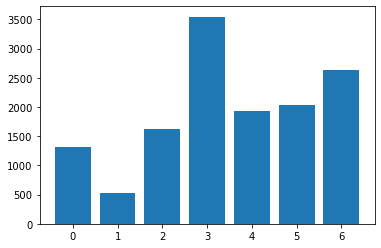

In [17]:
# plt.bar(df['Class'].value_counts())
plt.bar(x=df['Class'].value_counts().index,height=df['Class'].value_counts())
plt.show()

In [18]:
from sklearn import model_selection

In [19]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(df.iloc[:,:-1],df.iloc[:,-1], random_state=0)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [21]:
alg_Log=LogisticRegression()
alg_SVM=SVC()
alg_DT=DecisionTreeClassifier()
alg_RF=RandomForestClassifier()
alg_NB=MultinomialNB()
alg_KNN=KNeighborsClassifier()

alg_Log.fit(x_train,y_train)
y_pred_Log = alg_Log.predict(x_test)

alg_SVM.fit(x_train,y_train) 
y_pred_SVM = alg_SVM.predict(x_test)

alg_DT.fit(x_train,y_train)
y_pred_DT = alg_DT.predict(x_test)

alg_RF.fit(x_train,y_train)
y_pred_RF = alg_RF.predict(x_test)

alg_NB.fit(x_train,y_train)
y_pred_NB = alg_NB.predict(x_test)

alg_KNN.fit(x_train,y_train)
y_pred_KNN = alg_KNN.predict(x_test)

In [22]:
print("Logistic :",alg_Log.score(x_train,y_train),alg_Log.score(x_test,y_test))
print("SVM :",alg_SVM.score(x_train,y_train),alg_SVM.score(x_test,y_test))
print("Decsion Tree :",alg_DT.score(x_train,y_train),alg_DT.score(x_test,y_test))
print("Random Forest :",alg_RF.score(x_train,y_train),alg_RF.score(x_test,y_test))
print("Naive Bayes :",alg_NB.score(x_train,y_train),alg_NB.score(x_test,y_test))
print("KNN :",alg_KNN.score(x_train,y_train),alg_KNN.score(x_test,y_test))


Logistic : 0.6997452978056427 0.7064354980899207
SVM : 0.6343064263322884 0.6394357919482809
Decsion Tree : 1.0 0.8971495739053776
Random Forest : 1.0 0.9271231266529533
Naive Bayes : 0.7831112852664577 0.7878342638848075
KNN : 0.8142633228840125 0.7272994416691155


In [23]:
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

## EDA 

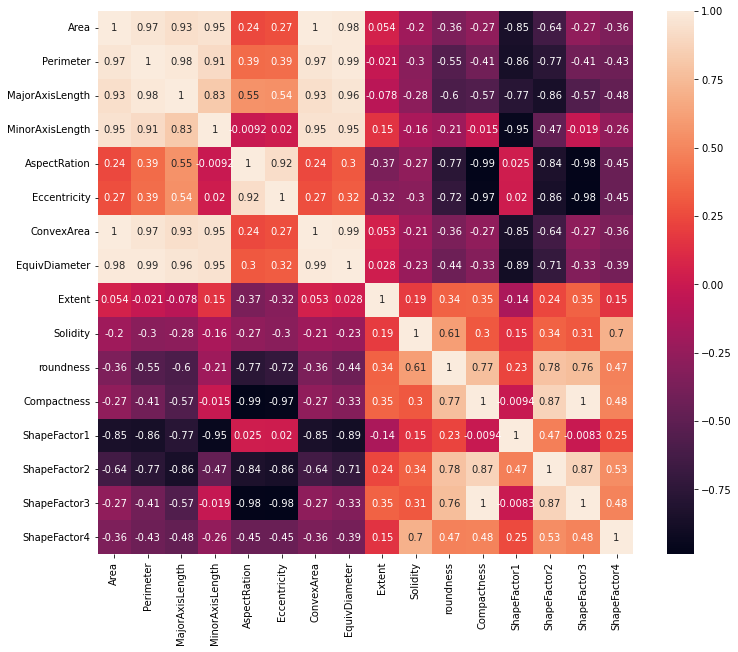

In [24]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.iloc[:,0:-1].corr(), annot=True)
plt.show()

In [25]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [26]:
corr_features = correlation(df.iloc[:,:-1], 0.95)
len(set(corr_features))

7

In [27]:
corr_features # features to be removed

{'Compactness',
 'ConvexArea',
 'EquivDiameter',
 'MajorAxisLength',
 'MinorAxisLength',
 'Perimeter',
 'ShapeFactor3'}

In [28]:
df.drop(corr_features, axis=1, inplace=True)

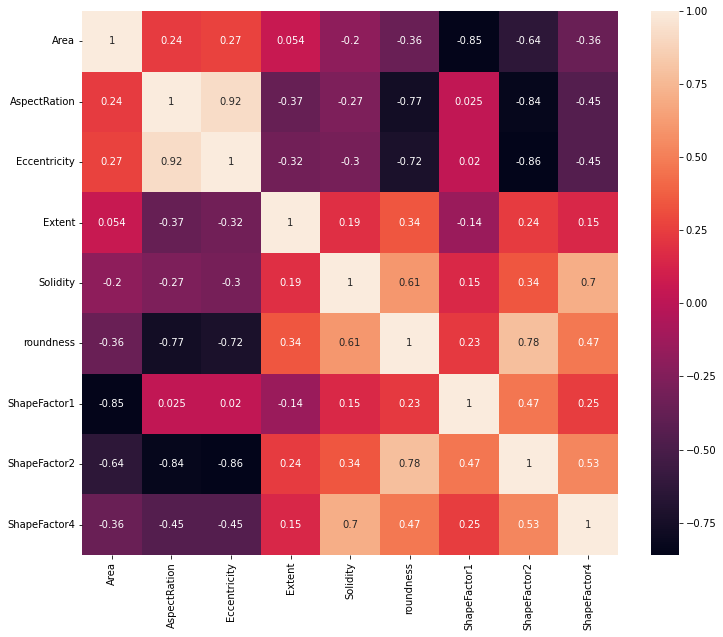

In [29]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.iloc[:,0:-1].corr(), annot=True)
plt.show()

Area Skewness : 2.9526055337634114
AspectRation Skewness : 0.582509194799859
Eccentricity Skewness : -1.0627067987899608
Extent Skewness : -0.8952497528055987
Solidity Skewness : -2.5498120642765034
roundness Skewness : -0.635678885490057
ShapeFactor1 Skewness : -0.5340816819340255
ShapeFactor2 Skewness : 0.3011927212083144
ShapeFactor4 Skewness : -2.759178791363645


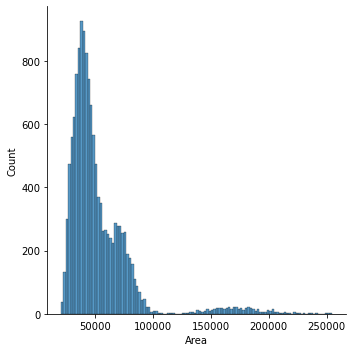

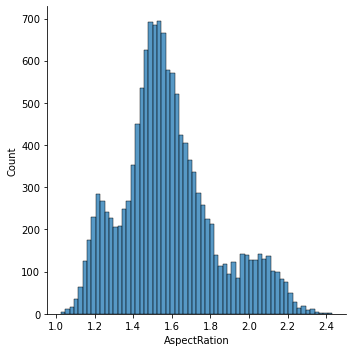

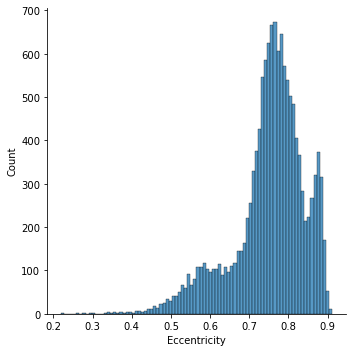

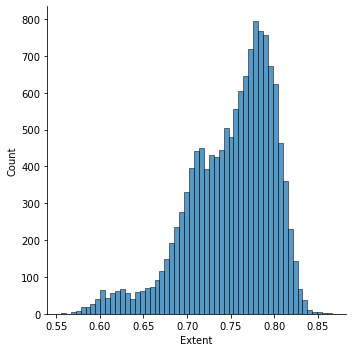

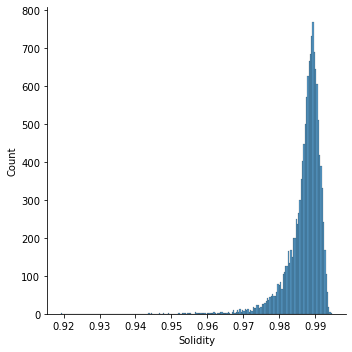

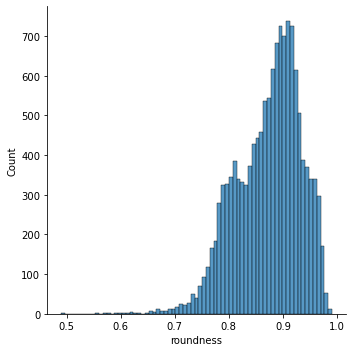

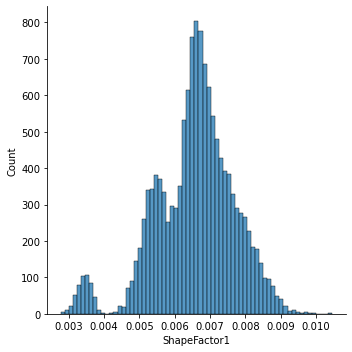

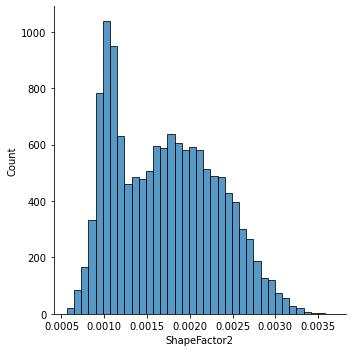

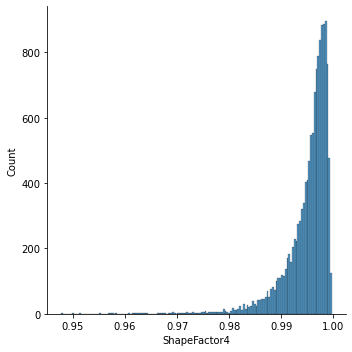

In [30]:
from scipy.stats import skew
for feature in df.iloc[:,:-1]:
    sns.displot(df[feature])
    print(feature,"Skewness :", skew(df[feature]))

In [31]:
df_transformed = df.copy()
df_transformed = df_transformed.drop_duplicates()
df_unstandardized = df_transformed.copy()
data_skewed = df_unstandardized.copy()

### Fields with high skewness
- Area
- Eccentricity
- Solidity
- ShapeFactor4

#### We'll transform the fields using __BOX-COX Transformation__ 

In [32]:
from sklearn.preprocessing import PowerTransformer

In [33]:
transformer = PowerTransformer(method='box-cox')
data_unskewed = pd.DataFrame(transformer.fit_transform(data_skewed.iloc[:,:-1].copy()))
data_unskewed.columns = data_skewed.iloc[:,:-1].columns

pd.DataFrame({'cols':data_unskewed.columns,'Yeo_Johnson_lambdas':transformer.lambdas_})

,cols,Yeo_Johnson_lambdas
0,Area,-0.815167
1,AspectRation,-0.417034
2,Eccentricity,3.681517
3,Extent,6.135946
4,Solidity,125.472783
5,roundness,4.446285
6,ShapeFactor1,1.847886
7,ShapeFactor2,0.350758
8,ShapeFactor4,173.672710


In [34]:
data_unskewed.head()

,Area,AspectRation,Eccentricity,Extent,Solidity,roundness,ShapeFactor1,ShapeFactor2,ShapeFactor4
0,-1.567780,-1.823011,-1.855924,0.158091,0.247777,1.633688,0.665091,2.026381,1.285548
1,-1.519853,-2.475280,-2.371417,0.682043,-0.818501,0.122886,0.316935,2.472027,1.110898
2,-1.431308,-1.746644,-1.785693,0.521752,0.503579,1.391981,0.577304,1.914207,1.500679
3,-1.348553,-2.097717,-2.093762,0.646282,-1.915000,0.446900,0.353797,2.100881,-0.628702
4,-1.331557,-2.735563,-2.517753,0.389288,1.056166,2.315216,0.049512,2.575334,1.565926


__Let's see the heatmap to see if there's a shift in correlation matrix__

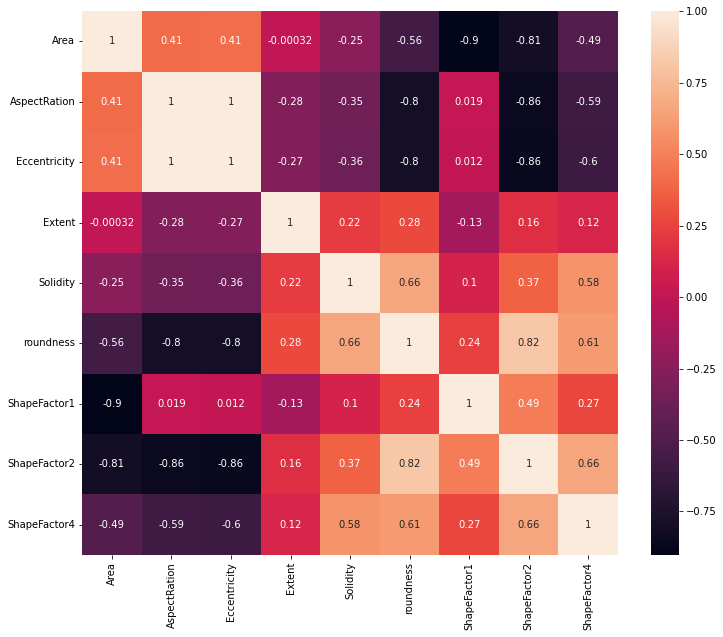

In [35]:
plt.figure(figsize=(12, 10))
sns.heatmap(data_unskewed.corr(), annot = True)
plt.show()

__The correlations have been affected by not by a huge amount. Hence, we can proceed and ML algoritms on the data__

In [36]:
X1_train, X1_test, Y1_train, Y1_test = model_selection.train_test_split(data_unskewed,data_skewed.iloc[:,-1], random_state=0)

In [37]:
data_unskewed.head()

,Area,AspectRation,Eccentricity,Extent,Solidity,roundness,ShapeFactor1,ShapeFactor2,ShapeFactor4
0,-1.567780,-1.823011,-1.855924,0.158091,0.247777,1.633688,0.665091,2.026381,1.285548
1,-1.519853,-2.475280,-2.371417,0.682043,-0.818501,0.122886,0.316935,2.472027,1.110898
2,-1.431308,-1.746644,-1.785693,0.521752,0.503579,1.391981,0.577304,1.914207,1.500679
3,-1.348553,-2.097717,-2.093762,0.646282,-1.915000,0.446900,0.353797,2.100881,-0.628702
4,-1.331557,-2.735563,-2.517753,0.389288,1.056166,2.315216,0.049512,2.575334,1.565926


### The figure below shows the distribution pre and post Box-Cox Transformation

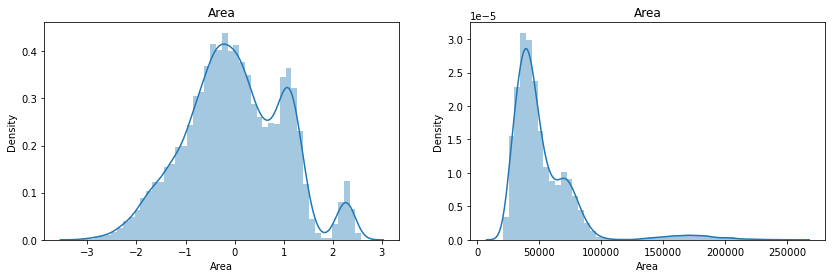

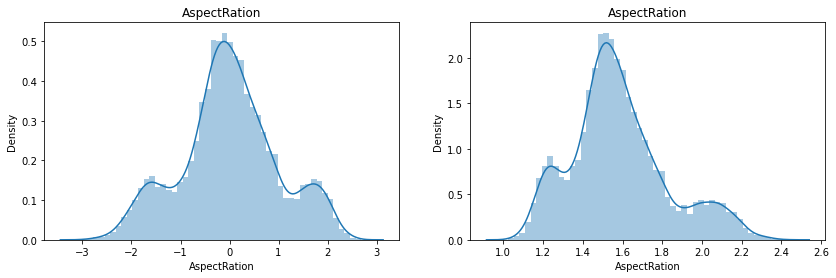

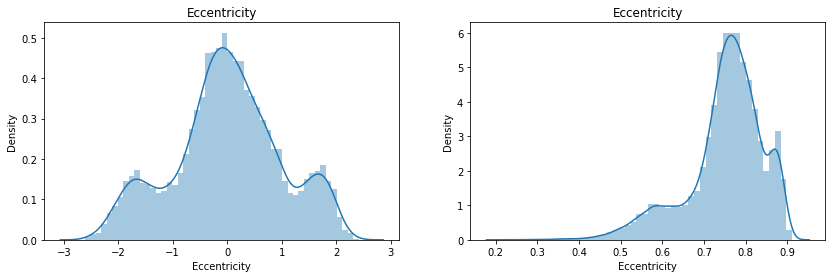

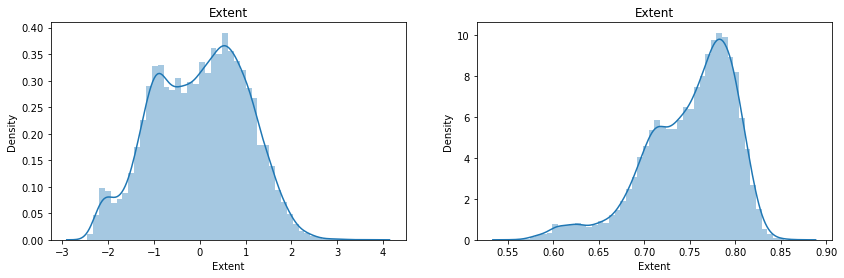

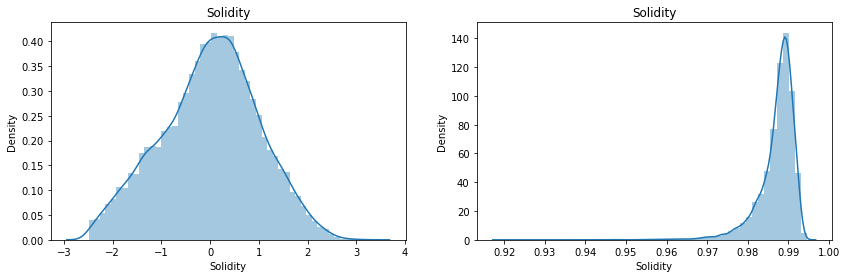

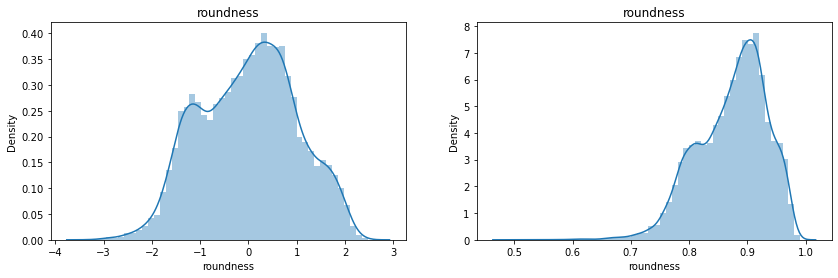

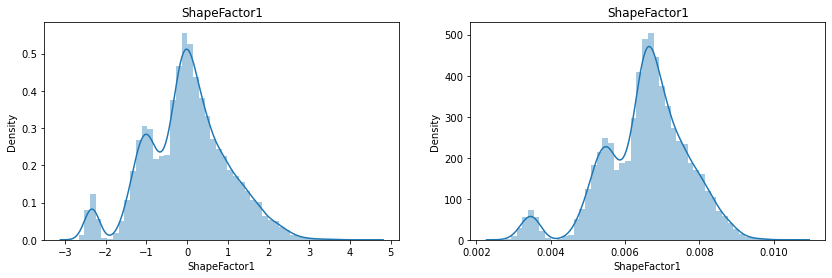

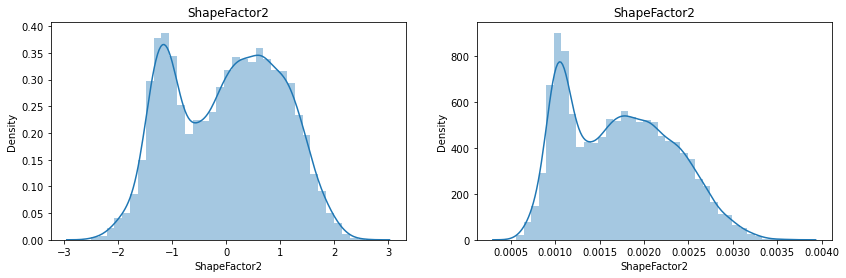

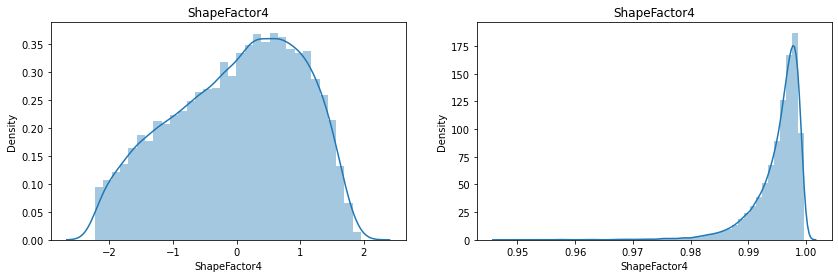

In [38]:
from scipy.stats import skew
for feature in data_unskewed:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(data_unskewed[feature])
    plt.title(feature)

    plt.subplot(122)
    sns.distplot(data_skewed[feature])
    plt.title(feature)

In [39]:
# profile = pandas_profiling.ProfileReport(data_unskewed)
# profile.to_file(output_file="Bean_data_after_preprocessing.html")

In [40]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(data_unskewed,data_skewed.iloc[:,-1], random_state=0)

# Applying Ensemble  algorithms on preprocessed data with Hyperparameter Tuning

## ADA BOOST

In [53]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import pickle

In [54]:
clf_ADA = AdaBoostClassifier(random_state=1)


In [84]:
parameters = {
    'n_estimators': range(1,10),
    'learning_rate': [0.01,0.05,0.1,0.2,0.5,0.9,1,1.1,1.2,1.3,1.5,1.4]
}
clf = GridSearchCV(clf_ADA, parameters, cv=5, verbose=True, n_jobs=-1)
clf.fit(X_train, Y_train)


Fitting 5 folds for each of 348 candidates, totalling 1740 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 0.9, 1,
                                           1.1, 1.2, 1.3, 1.5, 1.4],
                         'n_estimators': range(1, 30)},
             verbose=True)

In [85]:
print(clf.score(X_test, Y_test))
print(clf.best_estimator_)

0.7974010632014176
AdaBoostClassifier(learning_rate=1.3, n_estimators=10, random_state=1)


## Gradient Boost

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

In [90]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[50,100,200],
    "max_depth":[5,7,9],
    "learning_rate":[0.01,0.1,1,10]
}

In [91]:
cv = GridSearchCV(gbc,parameters,cv=5,verbose=True, n_jobs= -1)
cv.fit(X_train,Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'max_depth': [5, 7, 9],
                         'n_estimators': [50, 100, 200]},
             verbose=True)

In [95]:
cv.best_estimator_

GradientBoostingClassifier(max_depth=7)

In [98]:
cv.score(X_test,Y_test)

0.9240992321323095

### XGBOOST

In [101]:
import xgboost

In [149]:
classifier=xgboost.XGBRegressor(n_estimators = 500, learning_rate = 0.01, max_leaves = 8, n_jobs = -1, gamma = 1, max_depth = 15)


In [150]:
classifier.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=1, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=15, max_leaves=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [151]:
classifier.score(X_test, Y_test)

0.8511061927824407

In [121]:
## Hyper Parameter Optimization


n_estimators = [100, 300, 500]
max_depth = [5, 8,10,15]
# booster=['gbtree','gblinear']
learning_rate=[0.1,0.5,0.75,1]
# min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [122]:
random_cv = GridSearchCV(estimator=classifier,
                         param_grid= hyperparameter_grid,
            cv=3,n_jobs = -1,
            verbose = 5, 
            return_train_score = True)

In [153]:
random_cv.fit(X_train,Y_train)


## CONCLUSION
- Machine Learning algorithms solely seem to a good result 
- Gradient boosting does seem to give a boost to our score by +1% 
- XGBOOST did not exceed the score since we lack the resources to train the model with enough parameters.